In [1]:
from time import sleep
from math import log, exp
from random import random

import os
import sys
sys.path.append(os.path.dirname(sys.path[0]))

In [2]:
from deeplogs import Logger, Bar, Reader

In [3]:
model_hyperparam = {
    "version": 4,
    "epoch": 1,
    "batch_size": 128,
    "lr": 1e-3,
    
    "x_shape": (512,512),
    "y_shape": (10,),
    "nb_layers": 8,
}

In [4]:
logger = Logger(
    "v" + str(model_hyperparam["version"]),
    "A description of the run",
    model_hyperparam,
)

In [5]:
model_perf = random()
for epoch in range(model_hyperparam["epoch"]):
    size = 1000
    for batch in Bar(logger, f"Epoch {epoch+1}")(range(size)):
        logs = {}
        
        logs["acc"] = log(batch+1) * model_perf
        logs["loss"] = size/exp((batch+1)/size) * model_perf
        logs["val_acc"] = log(batch+1) * model_perf
        logs["val_loss"] = size/exp((batch+1)/size) * model_perf
        
        timestep = epoch + (batch/size)
        logger.scalar(timestep, **logs)
        
        sleep(0.005)
logger.flush()

In [6]:
assert False

AssertionError: 

In [7]:
reader = Reader()

In [8]:
reader.infos()

,description,version,epoch,batch_size,lr,x_shape,y_shape,nb_layers
name,,,,,,,,
v4,A description of the run,4,1,128,0.001,"(512, 512)","(10,)",8
v2,A description of the run,2,1,128,0.001,"(512, 512)","(10,)",8
v3,A description of the run,3,1,128,0.001,"(512, 512)","(10,)",8
v1,A description of the run,1,1,128,0.001,"(512, 512)","(10,)",8


In [9]:
reader.describe()

acc         loss      val_acc     val_loss
v4 count  1000.000000  1000.000000  1000.000000  1000.000000
   mean      5.617633   600.333096     5.617633   600.333096
   std       0.936375   171.970731     0.936375   171.970731
   min       0.000000   349.554627     0.000000   349.554627
   25%       5.249271   448.724872     5.249271   448.724872
   50%       5.905995   576.030133     5.905995   576.030133
   75%       6.290631   739.452422     6.290631   739.452422
   90%       6.463659   858.992245     6.463659   858.992245
   max       6.563666   949.238276     6.563666   949.238276
v2 count  1000.000000  1000.000000  1000.000000  1000.000000
   mean      3.601396   384.866257     3.601396   384.866257
   std       0.600299   110.248347     0.600299   110.248347
   min       0.000000   224.095226     0.000000   224.095226
   25%       3.365244   287.672065     3.365244   287.672065
   50%       3.786262   369.285922     3.786262   369.285922
   75%       4.032847   474.053967     4.032847   474.053967
   90%       4.143773   550.689495     4.143773   550.689495
   max       4.207887   608.545130     4.207887   608.545130
v3 count  1000.000000  1000.000000  1000.000000  1000.000000
   mean      3.456352   369.365918     3.456352   369.365918
   std       0.576122   105.808138     0.576122   105.808138
   min       0.000000   215.069878     0.000000   215.069878
   25%       3.229710   276.086185     3.229710   276.086185
   50%       3.633772   354.413076     3.633772   354.413076
   75%       3.870426   454.961628     3.870426   454.961628
   90%       3.976885   528.510691     3.976885   528.510691
   max       4.038416   584.036212     4.038416   584.036212
v1 count  1000.000000  1000.000000  1000.000000  1000.000000
   mean      0.914217    97.698585     0.914217    97.698585
   std       0.152386    27.986625     0.152386    27.986625
   min       0.000000    56.886739     0.000000    56.886739
   25%       0.854270    73.025767     0.854270    73.025767
   50%       0.961145    93.743505     0.961145    93.743505
   75%       1.023741   120.338951     1.023741   120.338951
   90%       1.051900   139.792937     1.051900   139.792937
   max       1.068175   154.479633     1.068175   154.479633

In [12]:
reader.scalar(using="plotly")

In [ ]:
assert False

AssertionError: 

In [13]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

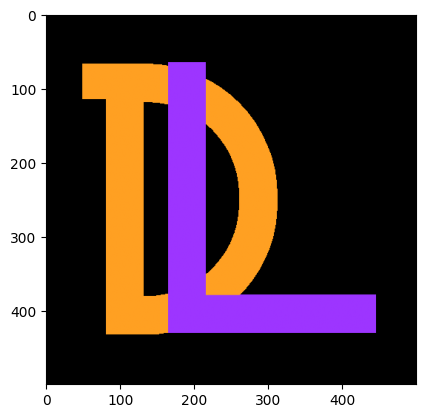

In [14]:
img = np.asarray(Image.open("../assets/logo.png"))[:,:,:3] / 255
fig = plt.imshow(img)

In [16]:
img1 = img; display(img1.shape)
img2 = img.transpose(2,0,1); display(img2.shape)
img3 = img.transpose(2,0,1)[None].repeat(16,0); display(img3.shape)
img4 = img.transpose(2,0,1)[None].repeat(128,0); display(img4.shape)
img5 = img[:,:,0]; display(img5.shape)

(500, 500, 3)

(3, 500, 500)

(16, 3, 500, 500)

(128, 3, 500, 500)

(500, 500)

In [17]:
logger.image(12, img1, "image1", "HWC")
logger.image(1, img2, "image2", "CHW")
logger.image(0.001, img3, "image3", "NCHW")
logger.image(0.9, img4, "image4", "NCHW")
logger.image(0., img5, "image5", "HW")